In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

spaceship = pd.read_csv('train.csv')
spaceship = spaceship.drop('Name', axis=1)

#please convert to integers
spaceship['CryoSleep'] = spaceship['CryoSleep'].map(lambda x: 1 if x is True else (0 if x is False else np.nan))
spaceship['VIP'] = spaceship['VIP'].map(lambda x: 1 if x is True else (0 if x is False else np.nan))
spaceship['Transported'] = spaceship['Transported'].map(lambda x: 1 if x is True else (0 if x is False else np.nan))

label_encoder = LabelEncoder()
spaceship['Cabin'] = label_encoder.fit_transform(spaceship['Cabin'])
spaceship['HomePlanet'] = label_encoder.fit_transform(spaceship['HomePlanet'])
spaceship['Destination'] = label_encoder.fit_transform(spaceship['Destination'])

# Calculate the percentages of 0s and 1s in the non-missing values of 'CryoSleep'
cryo_sleep_counts = spaceship['CryoSleep'].value_counts(normalize=True) * 100
percentage_0 = cryo_sleep_counts[0]
percentage_1 = cryo_sleep_counts[1]

# Fill in the missing values in 'CryoSleep' based on the percentages
spaceship['CryoSleep'].fillna(
    pd.Series(np.random.choice([0, 1], size=len(spaceship.index), p=[percentage_0 / 100, percentage_1 / 100])),
    inplace=True
)

# Calculate the percentages of 0s and 1s in the non-missing values of 'VIP'
VIP_counts = spaceship['VIP'].value_counts(normalize=True) * 100
percentage_0 = VIP_counts[0]
percentage_1 = VIP_counts[1]

# Fill in the missing values in 'CryoSleep' based on the percentages
spaceship['VIP'].fillna(
    pd.Series(np.random.choice([0, 1], size=len(spaceship.index), p=[percentage_0 / 100, percentage_1 / 100])),
    inplace=True
)

# Iterate over the columns and fill NaN values using exponential distribution
for col in ['VRDeck', 'Spa', 'ShoppingMall', 'FoodCourt', 'RoomService']:
    mean = spaceship[col].mean()
    lambda_param = 1 / mean
    random_values = np.random.exponential(scale=1/lambda_param, size=len(spaceship))
    spaceship[col].fillna(pd.Series(random_values), inplace=True)

# Calculate mean and standard deviation of non-missing values
mean = spaceship['Age'].mean()
std = spaceship['Age'].std()

# Generate random values from normal distribution
random_values = np.random.normal(loc=mean, scale=std, size=len(spaceship))

# Replace NaN values with generated random values
spaceship['Age'].fillna(pd.Series(random_values), inplace=True)    

spaceship.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [10]:

# Example DataFrame
spaceship_test = pd.read_csv('test.csv')
spaceship_test = spaceship_test.drop('Name', axis=1)

# Convert to integers
spaceship_test['CryoSleep'] = spaceship_test['CryoSleep'].map(lambda x: 1 if x is True else (0 if x is False else np.nan))
spaceship_test['VIP'] = spaceship_test['VIP'].map(lambda x: 1 if x is True else (0 if x is False else np.nan))

# Label encoding for categorical columns
label_encoder = LabelEncoder()
spaceship_test['Cabin'] = label_encoder.fit_transform(spaceship_test['Cabin'])
spaceship_test['HomePlanet'] = label_encoder.fit_transform(spaceship_test['HomePlanet'])
spaceship_test['Destination'] = label_encoder.fit_transform(spaceship_test['Destination'])

# Calculate the percentages of 0s and 1s in the non-missing values of 'CryoSleep'
cryo_sleep_counts = spaceship_test['CryoSleep'].value_counts(normalize=True) * 100
percentage_0 = cryo_sleep_counts.get(0, 0)
percentage_1 = cryo_sleep_counts.get(1, 0)

# Fill in the missing values in 'CryoSleep' based on the percentages
spaceship_test['CryoSleep'].fillna(
    pd.Series(np.random.choice([0, 1], size=len(spaceship_test.index), p=[percentage_0 / 100, percentage_1 / 100])),
    inplace=True
)

# Calculate the percentages of 0s and 1s in the non-missing values of 'VIP'
VIP_counts = spaceship_test['VIP'].value_counts(normalize=True) * 100
percentage_0 = VIP_counts.get(0, 0)
percentage_1 = VIP_counts.get(1, 0)

# Fill in the missing values in 'VIP' based on the percentages
spaceship_test['VIP'].fillna(
    pd.Series(np.random.choice([0, 1], size=len(spaceship_test.index), p=[percentage_0 / 100, percentage_1 / 100])),
    inplace=True
)

# Iterate over the columns and fill NaN values using exponential distribution
for col in ['VRDeck', 'Spa', 'ShoppingMall', 'FoodCourt', 'RoomService']:
    mean = spaceship_test[col].mean()
    lambda_param = 1 / mean
    random_values = np.random.exponential(scale=1 / lambda_param, size=len(spaceship_test))
    spaceship_test[col].fillna(pd.Series(random_values), inplace=True)

# Calculate mean and standard deviation of non-missing values
mean = spaceship_test['Age'].mean()
std = spaceship_test['Age'].std()

# Generate random values from normal distribution
random_values = np.random.normal(loc=mean, scale=std, size=len(spaceship_test))

# Replace NaN values with generated random values
spaceship_test['Age'].fillna(pd.Series(random_values), inplace=True)

spaceship_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,0,1.0,2784,2,27.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0018_01,0,0.0,1867,2,19.000000,0.0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,1,1.0,257,0,31.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0021_01,1,0.0,259,2,38.000000,0.0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,0,0.0,1940,2,20.000000,0.0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,0,1.0,2679,2,34.000000,0.0,0.0,0.0,0.0,0.0,0.0
4273,9269_01,0,0.0,3265,2,42.000000,0.0,0.0,847.0,17.0,10.0,144.0
4274,9271_01,2,1.0,602,0,31.967887,0.0,0.0,0.0,0.0,0.0,0.0
4275,9273_01,1,0.0,603,3,18.306597,0.0,0.0,2680.0,0.0,0.0,523.0


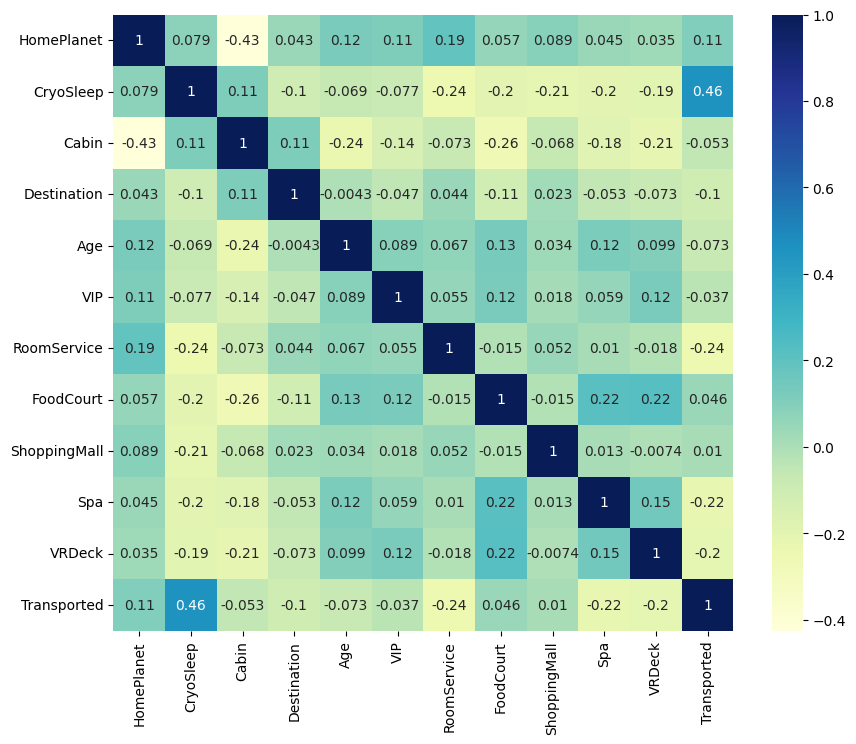

In [50]:
int_columns = spaceship.select_dtypes(include=np.number)
int_df = spaceship[int_columns.columns]

correlation_matrix = int_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()


In [11]:
X = spaceship.iloc[:, :-1]
y = spaceship.iloc[:, -1]

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [56]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier( )

In [57]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [58]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [59]:
# Convert 0s and 1s to False and True
y_pred_bool = y_pred.astype(bool)
y_pred_bool

array([False,  True,  True, ..., False,  True, False])

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7782888684452622

In [61]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train, cv=10)

array([0.79294479, 0.79601227, 0.78527607, 0.78834356, 0.80214724,
       0.76226994, 0.82055215, 0.77760736, 0.79601227, 0.80337942])

In [ ]:
final_df = pd.DataFrame(spaceship_test['PassengerId'])
final_df['Transported'] = y_pred_bool
final_df.to_csv('spaceship_tryhard.csv', index = False )